# 이미지를 위한 인공 신경망

### 합성곱 신경망의 구성 요소

##### 합성곱

In [27]:
from tensorflow import keras
keras.layers.Conv2D(10, kernel_size=(3,3), activation='relu', padding='same', strides=1)

### 합성곱 신경망을 사용한 이미지 분류

In [28]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

##### 합성곱 신경망 만들기

In [29]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))

In [30]:
model.add(keras.layers.MaxPooling2D(2))

In [31]:
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [32]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_2 (Dense)             (None, 100)              

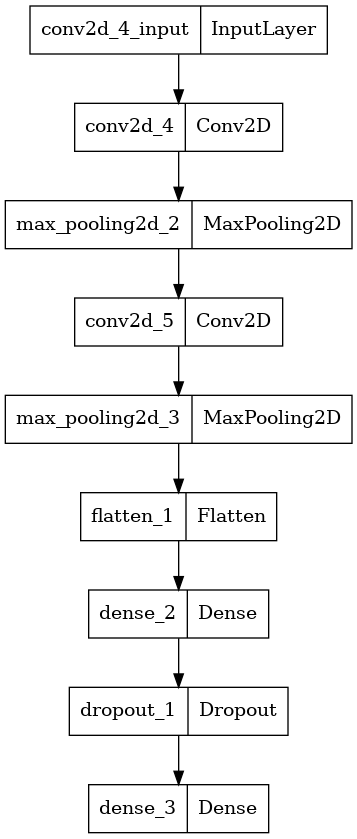

In [34]:
keras.utils.plot_model(model)

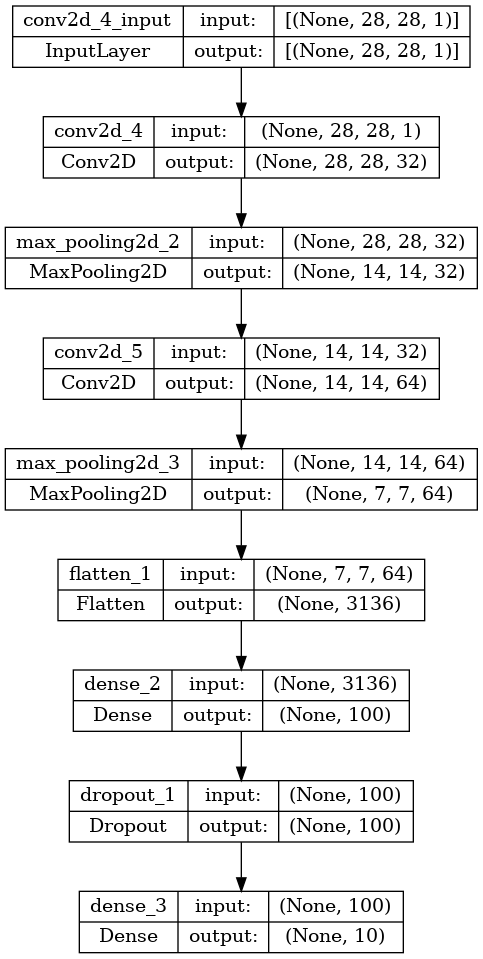

In [35]:
keras.utils.plot_model(model, show_shapes=True)

In [36]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 14s 9ms/step - loss: 0.5217 - accuracy: 0.8138 - val_loss: 0.3363 - val_accuracy: 0.8764
Epoch 2/20
1500/1500 [==============================] - 13s 9ms/step - loss: 0.3486 - accuracy: 0.8754 - val_loss: 0.2678 - val_accuracy: 0.8999
Epoch 3/20
1500/1500 [==============================] - 13s 9ms/step - loss: 0.2966 - accuracy: 0.8935 - val_loss: 0.2763 - val_accuracy: 0.9002
Epoch 4/20
1500/1500 [==============================] - 13s 9ms/step - loss: 0.2650 - accuracy: 0.9040 - val_loss: 0.2330 - val_accuracy: 0.9137
Epoch 5/20
1500/1500 [==============================] - 13s 9ms/step - loss: 0.2413 - accuracy: 0.9115 - val_loss: 0.2348 - val_accuracy: 0.9158
Epoch 6/20
1500/1500 [==============================] - 13s 9ms/step - loss: 0.2200 - accuracy: 0.9185 - val_loss: 0.2315 - val_accuracy: 0.9174
Epoch 7/20
1500/1500 [==============================] - 13s 9ms/step - loss: 0.2030 - accuracy: 0.9245 - val_loss: 0.2244 - val_ac

<function matplotlib.pyplot.show(close=None, block=None)>

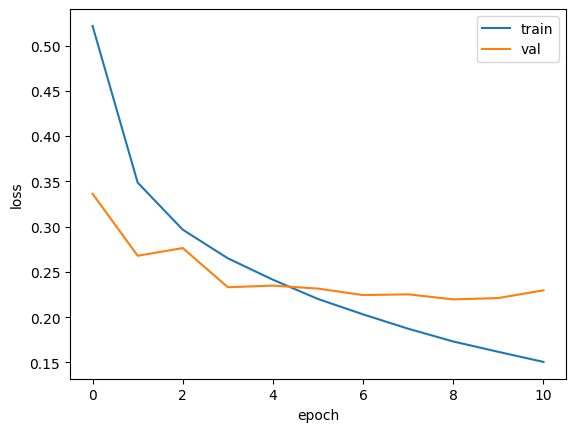

In [37]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show

In [38]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.2196 - accuracy: 0.9244


[0.21959730982780457, 0.9244166612625122]

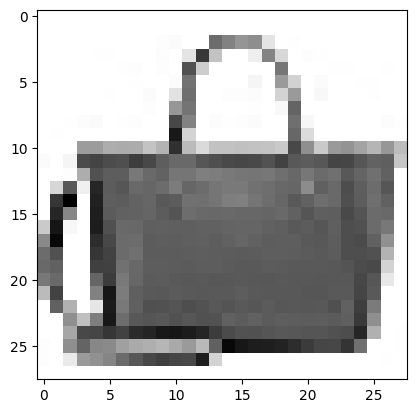

In [39]:
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

In [40]:
preds = model.predict(val_scaled[0:1])
preds

1/1 [==============================] - 0s 46ms/step


array([[9.67083774e-16, 2.81426995e-29, 2.53248292e-21, 2.33414950e-17,
        1.74264259e-19, 7.85456299e-18, 1.02795149e-17, 1.22424144e-20,
        1.00000000e+00, 1.98615375e-21]], dtype=float32)

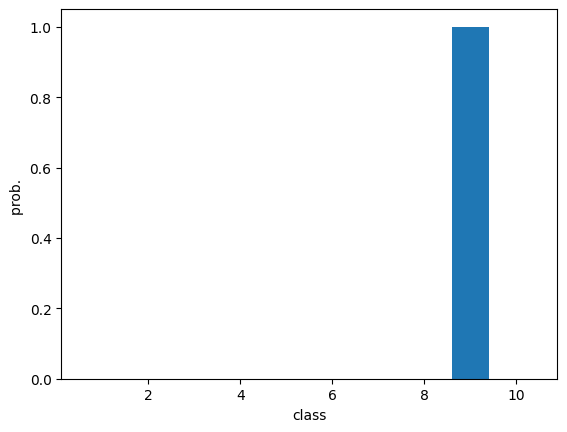

In [41]:
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob. ')
plt.show()

In [42]:
classes = ['티셔츠', '바지', '스웨터', '트레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

In [43]:
import numpy as np

classes[np.argmax(preds)]

'가방'

In [45]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

In [46]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 1s 2ms/step - loss: 0.2453 - accuracy: 0.9172


[0.24525651335716248, 0.9172000288963318]